In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

In [2]:
import max_ent.examples.grid_9_by_9 as G
from max_ent.gridworld import Directions
%matplotlib notebook
np.random.seed(123)

In [3]:
def create_world(title, blue, green, cs=[], ca=[], cc=[], start=0, goal=8, vmin=-50, vmax=10):
    n_cfg = G.config_world(blue, green, cs, ca, cc, goal,start)
    n = n_cfg.mdp

    # Generate demonstrations and plot the world
    demo = G.generate_trajectories(n.world, n.reward, n.start, n.terminal)
    vmin = -50
    vmax = 10
    G.plot_world(title, n, n_cfg.state_penalties,
           n_cfg.action_penalties, n_cfg.color_penalties,
           demo, n_cfg.blue, n_cfg.green, vmin=vmin, vmax=vmax)   
    return n, n_cfg, demo

# Nominal world

<IPython.core.display.Javascript object>


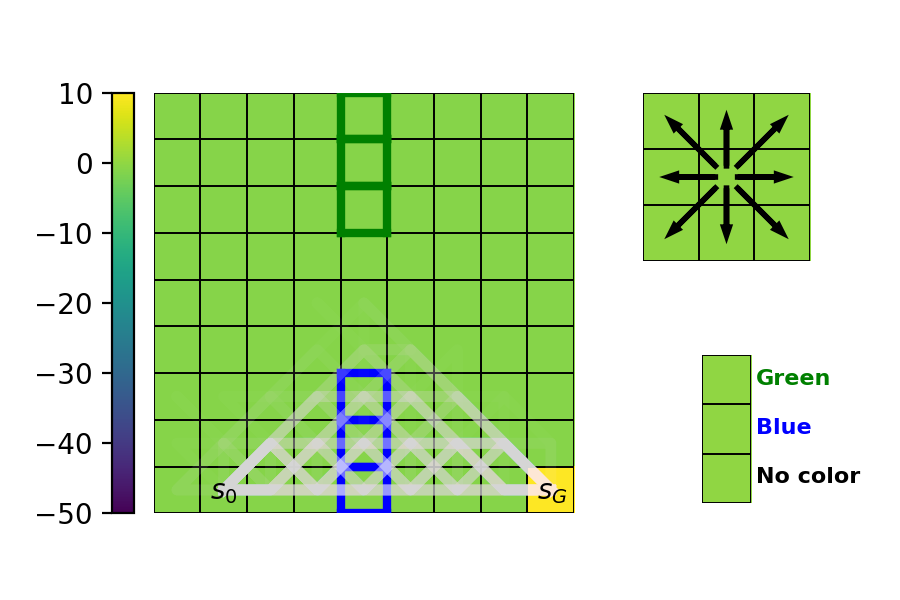

In [5]:
blue = np.asarray([4, 13, 22])  # blue states
green = np.asarray([58, 67, 76])  # green states

start = 1
goal = 8
n, n_cfg, demo_n = create_world('Nominal', blue, green, start=start, goal=goal)

## Constrained world

<IPython.core.display.Javascript object>


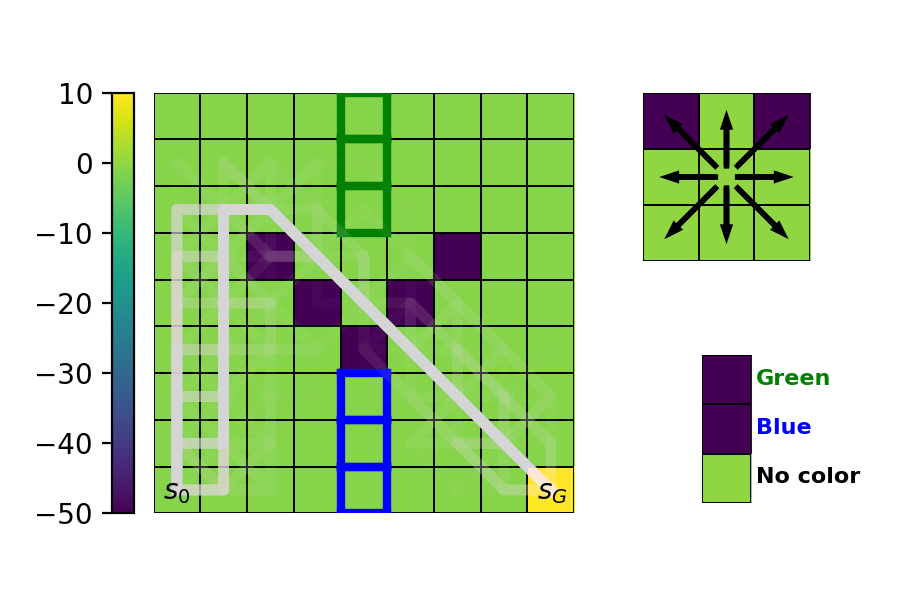

In [6]:
cs = [31, 39, 41, 47, 51]  # constrained states
ca = [Directions.UP_LEFT, Directions.UP_RIGHT]  # constrained actions
cc = [1, 2]  # constrained colors

c, c_cfg, demo_c = create_world('Constrained', blue, green, cs, ca, cc)

## Learn constraints

In [7]:
learned_params = G.learn_constraints(n.reward, c.world, c.terminal, demo_c.trajectories)

         1: DELTA:  0.00000, MAE:  0.492782680194337
       101: DELTA:  0.30806, MAE:  0.169618466988934
       201: DELTA:  0.22516, MAE:  0.054303887387209
       301: DELTA:  0.23202, MAE:  0.033418084635878
       401: DELTA:  0.46391, MAE:  0.020124286980369


<IPython.core.display.Javascript object>


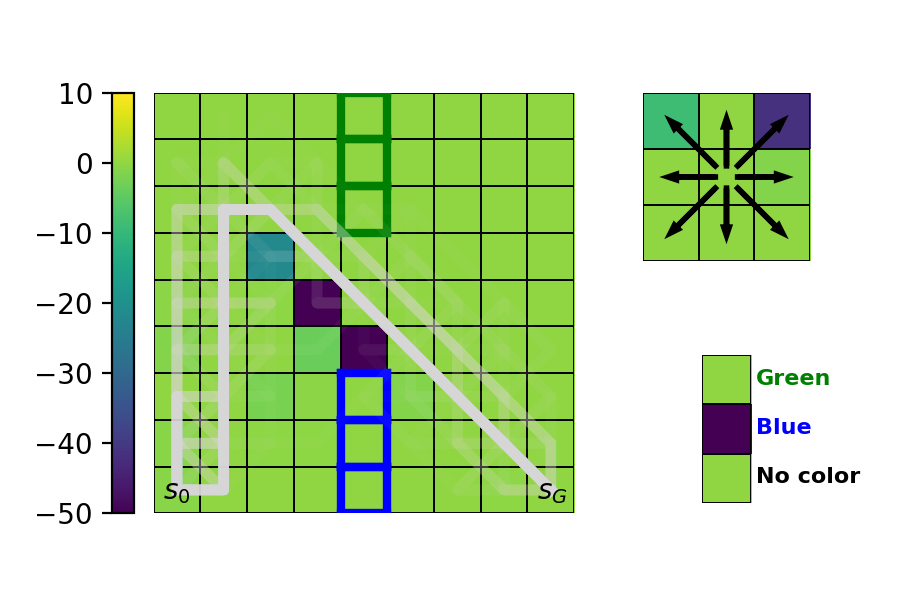

In [9]:
learned_mdp = G.MDP(c.world, learned_params.reward, c.terminal, c.start)
demo_l = G.generate_trajectories(c.world, learned_params.reward, c.start, c.terminal)
p = G.plot_world('Learned Constrained', learned_mdp, learned_params.state_weights, 
              learned_params.action_weights, learned_params.color_weights, 
              demo_l, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

In [8]:
print(learned_params)

ICRL_Result(omega=array([6.42700722e-01, 9.95432069e-10, 2.51442826e-03, 1.28876032e-03,
       1.49856339e-04, 1.08896782e-03, 6.86027952e-02, 8.93091096e-02,
       9.97426623e-07, 6.15310281e-01, 3.51889665e-12, 9.05212319e-02,
       8.96271072e-02, 2.02051446e-03, 3.59710356e-03, 7.48213659e-03,
       1.38634131e-16, 5.63739358e-04, 1.75717756e-02, 1.29235679e-15,
       2.05565253e+00, 3.18939537e-01, 2.74005305e-04, 1.17208103e+00,
       4.82009931e-20, 5.92336695e-05, 6.27433990e-07, 1.09777714e+00,
       2.37342450e-19, 6.45622876e-02, 3.39222711e+00, 5.08542572e+01,
       1.52814358e-21, 1.38859176e-04, 5.50329041e-07, 9.41335981e-07,
       3.19691876e-01, 2.49833175e-21, 1.05462782e-01, 1.32880014e+02,
       2.20267596e-23, 3.60366943e-03, 1.12996291e-07, 2.03070147e-06,
       1.14958103e-06, 2.29361773e-07, 4.19776704e-23, 2.16699301e+01,
       3.10108310e-24, 2.28289631e-05, 9.23804061e-07, 1.80466598e-06,
       1.14630761e-06, 1.01891485e-06, 4.47427795e-07, 2.73

## MDFT as orchestrator

In [ ]:
fig = plt.figure(figsize=(9, 5))
axis = fig.subplots(3, 3)
for i in range(9):
    w = [(i+1)/10, 1 - (i+1)/10]
    demo_mdft = G.generate_mdft_trajectories(n.world, n.reward, learned_params.reward, n.start, n.terminal, w)
    plt.ioff()
    f1 = G.plot_world(f'w = ({w[0]:0.1f}, {w[1]:0.1f})', learned_mdp, learned_params.state_weights, 
                  learned_params.action_weights, learned_params.color_weights, 
                  demo_mdft, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    plt.close()
    plt.ion()
    canvas = FigureCanvas(f1)
    canvas.draw()
    X = np.array(canvas.renderer.buffer_rgba())
    
    x = i // 3
    y = i % 3
    axis[x,y].axis('off')   
    axis[x,y].set_title(f'w = ({w[0]:0.1f}, {w[1]:0.1f})', fontsize=7)
    axis[x,y].imshow(X)
    
fig.tight_layout()